In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
#import tensorflow as tf
import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib import rcParams
import io
import os
import datetime
from scipy import stats
import statsmodels.api as sm
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.stats.diagnostic import acorr_ljungbox
import sklearn
import sklearn.datasets as datasets
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.preprocessing import scale
#from pmdarima.arima import auto_arima
import IPython
import IPython.display
sns.set_style("whitegrid")

mpl.rcParams['figure.figsize'] = (6, 4)
mpl.rcParams['axes.grid'] = False

#loading data for into DataFrames
df_2021 = pd.read_csv('C:/Users/Nedyalka Gabrovska/Desktop/Start/Datasets/ISO_2021.csv')
df_2021

,Date,Hr_End,DA_Demand,RT_Demand,DA_LMP,DA_EC,DA_CC,DA_MLC,RT_LMP,RT_EC,...,RT_MLC,Dry_Bulb,Dew_Point,System_Load,Reg_Service_Price,Reg_Capacity_Price,Min_5min_RSP,Max_5min_RSP,Min_5min_RCP,Max_5min_RCP
0,01/01/2021,1,"11,787.20","11,941.46",24.66,24.24,0.20,0.22,26.76,26.53,...,0.23,30,21,"12,192",0.21,8.20,0.19,0.25,5.21,17.17
1,01/01/2021,2,"11,592.40","11,505.92",24.66,24.24,0.21,0.21,44.66,44.26,...,0.40,29,21,"11,740",0.70,184.86,0.19,0.75,5.21,201.19
2,01/01/2021,3,"11,393.00","11,243.50",24.62,24.19,0.21,0.22,24.80,24.58,...,0.22,30,20,"11,476",0.17,24.51,0.05,0.75,3.31,201.19
3,01/01/2021,4,"11,449.20","11,166.09",24.10,23.71,0.18,0.21,25.06,24.84,...,0.22,29,20,"11,399",0.05,9.16,0.05,0.05,8.96,9.18
4,01/01/2021,5,"11,556.50","11,281.03",24.15,23.81,0.14,0.20,25.15,24.90,...,0.23,28,20,"11,508",0.05,8.58,0.05,0.05,8.38,9.18
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8755,31/12/2021,20,"13,467.30","14,055.40",35.15,35.32,0.00,-0.17,33.88,33.93,...,-0.05,44,42,"14,301",0.01,11.63,0.01,0.01,8.24,21.78
8756,31/12/2021,21,"12,928.80","13,427.91",36.83,37.04,0.00,-0.21,31.23,31.28,...,-0.05,44,42,"13,661",0.04,7.53,0.01,0.05,7.23,9.78
8757,31/12/2021,22,"12,192.30","12,816.57",35.35,35.57,0.00,-0.22,31.30,31.38,...,-0.08,44,42,"13,043",0.05,7.17,0.05,0.05,7.16,7.23
8758,31/12/2021,23,"11,518.90","12,080.48",32.79,32.93,0.00,-0.14,31.19,31.28,...,-0.09,44,43,"12,286",0.17,6.21,0.05,0.19,6.02,7.16


In [2]:
df_2022 = pd.read_csv('C:/Users/Nedyalka Gabrovska/Desktop/Start/Datasets/ISO_2022.csv')
df_2022

,Date,Hr_End,DA_Demand,RT_Demand,DA_LMP,DA_EC,DA_CC,DA_MLC,RT_LMP,RT_EC,...,RT_MLC,Dry_Bulb,Dew_Point,System_Load,Reg_Service_Price,Reg_Capacity_Price,Min_5min_RSP,Max_5min_RSP,Min_5min_RCP,Max_5min_RCP
0,01/01/2022,1,10845.4,10789.727,32.22,32.35,-0.12,-0.01,25.90,25.95,...,-0.05,44,43,10983,0.237500,11.284167,0.05,0.30,9.99,20.12
1,01/01/2022,2,10593.7,10320.195,32.12,32.31,-0.14,-0.05,25.87,25.87,...,0.00,44,43,10510,0.300000,11.383333,0.30,0.30,10.54,11.46
2,01/01/2022,3,10207.3,9972.371,30.76,30.85,0.00,-0.09,27.51,27.50,...,0.01,44,43,10161,0.112500,12.375000,0.05,0.30,11.46,12.68
3,01/01/2022,4,10026.4,9779.883,29.60,29.69,0.00,-0.09,25.14,25.13,...,0.01,44,43,9970,0.258333,11.763333,0.05,0.30,11.58,12.68
4,01/01/2022,5,10283.0,9777.168,30.78,30.86,0.00,-0.08,29.28,29.27,...,0.01,44,43,9973,0.112500,12.405000,0.05,0.30,11.58,12.68
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8755,31/12/2022,20,12910.4,13203.097,39.01,38.97,0.00,0.04,26.36,26.27,...,0.09,51,50,13501,0.335000,109.751667,0.01,0.40,9.52,123.90
8756,31/12/2022,21,11992.9,12587.227,38.88,38.88,0.00,0.00,25.38,25.31,...,0.07,51,49,12877,0.075000,21.605833,0.01,0.40,12.71,118.36
8757,31/12/2022,22,11444.8,11994.734,38.68,38.73,0.00,-0.05,31.80,31.69,...,0.11,50,49,12274,0.230000,10.656667,0.01,0.25,10.46,12.82
8758,31/12/2022,23,10394.4,11392.145,38.65,38.69,0.00,-0.04,44.29,44.16,...,0.13,50,49,11646,0.083333,12.466667,0.05,0.25,10.46,12.78


In [3]:
df_2023 = pd.read_csv('C:/Users/Nedyalka Gabrovska/Desktop/Start/Datasets/ISO_2023.csv')
df_2023

,Date,Hr_End,DA_Demand,RT_Demand,DA_LMP,DA_EC,DA_CC,DA_MLC,RT_LMP,RT_EC,...,RT_MLC,Dry_Bulb,Dew_Point,System_Load,Reg_Service_Price,Reg_Capacity_Price,Min_5min_RSP,Max_5min_RSP,Min_5min_RCP,Max_5min_RCP
0,01/01/2023,1,"9,565.90","10,288.38",31.27,31.28,0.00,-0.01,36.99,36.93,...,0.06,50,49,"10,511",0.05,24.25,0.05,0.05,13.22,79.40
1,01/01/2023,2,"9,063.30","9,848.10",28.42,28.44,0.00,-0.02,33.45,33.39,...,0.06,50,49,"10,050",0.01,1.70,0.00,0.05,0.00,13.22
2,01/01/2023,3,"9,107.00","9,504.49",26.81,26.83,0.00,-0.02,32.19,32.09,...,0.10,50,49,"9,718",0.00,0.00,0.00,0.00,0.00,0.00
3,01/01/2023,4,"9,056.70","9,323.07",28.17,28.19,0.00,-0.02,31.89,31.75,...,0.13,50,49,"9,532",0.00,0.00,0.00,0.00,0.00,0.00
4,01/01/2023,5,"9,409.20","9,295.37",29.67,29.70,0.00,-0.03,31.93,31.80,...,0.13,50,48,"9,507",0.00,33.80,0.00,0.00,0.00,40.56
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6547,30/09/2023,20,"12,667.40","12,648.59",30.97,30.98,0.00,-0.01,24.85,24.85,...,0.00,59,54,"12,852",0.01,24.98,0.01,0.01,15.93,25.80
6548,30/09/2023,21,"12,238.90","12,177.62",26.45,26.45,0.00,0.00,21.30,21.30,...,0.00,58,54,"12,383",0.01,13.14,0.01,0.01,11.99,25.80
6549,30/09/2023,22,"12,048.40","11,578.60",24.96,24.97,0.00,-0.01,20.41,20.42,...,-0.01,58,54,"11,762",0.01,8.34,0.01,0.01,8.01,11.99
6550,30/09/2023,23,"11,311.60","10,852.06",22.66,22.66,0.00,0.00,18.68,18.69,...,-0.01,57,54,"11,030",0.18,10.25,0.01,0.19,7.99,10.45


In [4]:
#concatinating DataFrames
df = pd.concat([df_2021, df_2022, df_2023], ignore_index=True)
df

,Date,Hr_End,DA_Demand,RT_Demand,DA_LMP,DA_EC,DA_CC,DA_MLC,RT_LMP,RT_EC,...,RT_MLC,Dry_Bulb,Dew_Point,System_Load,Reg_Service_Price,Reg_Capacity_Price,Min_5min_RSP,Max_5min_RSP,Min_5min_RCP,Max_5min_RCP
0,01/01/2021,1,"11,787.20","11,941.46",24.66,24.24,0.20,0.22,26.76,26.53,...,0.23,30,21,"12,192",0.21,8.20,0.19,0.25,5.21,17.17
1,01/01/2021,2,"11,592.40","11,505.92",24.66,24.24,0.21,0.21,44.66,44.26,...,0.40,29,21,"11,740",0.70,184.86,0.19,0.75,5.21,201.19
2,01/01/2021,3,"11,393.00","11,243.50",24.62,24.19,0.21,0.22,24.80,24.58,...,0.22,30,20,"11,476",0.17,24.51,0.05,0.75,3.31,201.19
3,01/01/2021,4,"11,449.20","11,166.09",24.10,23.71,0.18,0.21,25.06,24.84,...,0.22,29,20,"11,399",0.05,9.16,0.05,0.05,8.96,9.18
4,01/01/2021,5,"11,556.50","11,281.03",24.15,23.81,0.14,0.20,25.15,24.90,...,0.23,28,20,"11,508",0.05,8.58,0.05,0.05,8.38,9.18
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24067,30/09/2023,20,"12,667.40","12,648.59",30.97,30.98,0.00,-0.01,24.85,24.85,...,0.00,59,54,"12,852",0.01,24.98,0.01,0.01,15.93,25.80
24068,30/09/2023,21,"12,238.90","12,177.62",26.45,26.45,0.00,0.00,21.30,21.30,...,0.00,58,54,"12,383",0.01,13.14,0.01,0.01,11.99,25.80
24069,30/09/2023,22,"12,048.40","11,578.60",24.96,24.97,0.00,-0.01,20.41,20.42,...,-0.01,58,54,"11,762",0.01,8.34,0.01,0.01,8.01,11.99
24070,30/09/2023,23,"11,311.60","10,852.06",22.66,22.66,0.00,0.00,18.68,18.69,...,-0.01,57,54,"11,030",0.18,10.25,0.01,0.19,7.99,10.45


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24072 entries, 0 to 24071
Data columns (total 21 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Date                24072 non-null  object 
 1   Hr_End              24072 non-null  int64  
 2   DA_Demand           24072 non-null  object 
 3   RT_Demand           24072 non-null  object 
 4   DA_LMP              24072 non-null  float64
 5   DA_EC               24072 non-null  float64
 6   DA_CC               24072 non-null  float64
 7   DA_MLC              24072 non-null  float64
 8   RT_LMP              24072 non-null  float64
 9   RT_EC               24072 non-null  float64
 10  RT_CC               24072 non-null  float64
 11  RT_MLC              24072 non-null  float64
 12  Dry_Bulb            24072 non-null  int64  
 13  Dew_Point           24072 non-null  int64  
 14  System_Load         24072 non-null  object 
 15  Reg_Service_Price   24072 non-null  float64
 16  Reg_

In [6]:
#displaying first five rows
display(df.head())

,Date,Hr_End,DA_Demand,RT_Demand,DA_LMP,DA_EC,DA_CC,DA_MLC,RT_LMP,RT_EC,...,RT_MLC,Dry_Bulb,Dew_Point,System_Load,Reg_Service_Price,Reg_Capacity_Price,Min_5min_RSP,Max_5min_RSP,Min_5min_RCP,Max_5min_RCP
0,01/01/2021,1,"11,787.20","11,941.46",24.66,24.24,0.20,0.22,26.76,26.53,...,0.23,30,21,"12,192",0.21,8.20,0.19,0.25,5.21,17.17
1,01/01/2021,2,"11,592.40","11,505.92",24.66,24.24,0.21,0.21,44.66,44.26,...,0.40,29,21,"11,740",0.70,184.86,0.19,0.75,5.21,201.19
2,01/01/2021,3,"11,393.00","11,243.50",24.62,24.19,0.21,0.22,24.80,24.58,...,0.22,30,20,"11,476",0.17,24.51,0.05,0.75,3.31,201.19
3,01/01/2021,4,"11,449.20","11,166.09",24.10,23.71,0.18,0.21,25.06,24.84,...,0.22,29,20,"11,399",0.05,9.16,0.05,0.05,8.96,9.18
4,01/01/2021,5,"11,556.50","11,281.03",24.15,23.81,0.14,0.20,25.15,24.90,...,0.23,28,20,"11,508",0.05,8.58,0.05,0.05,8.38,9.18


In [7]:
#displaying last five rows
display(df.tail())

,Date,Hr_End,DA_Demand,RT_Demand,DA_LMP,DA_EC,DA_CC,DA_MLC,RT_LMP,RT_EC,...,RT_MLC,Dry_Bulb,Dew_Point,System_Load,Reg_Service_Price,Reg_Capacity_Price,Min_5min_RSP,Max_5min_RSP,Min_5min_RCP,Max_5min_RCP
24067,30/09/2023,20,"12,667.40","12,648.59",30.97,30.98,0.00,-0.01,24.85,24.85,...,0.00,59,54,"12,852",0.01,24.98,0.01,0.01,15.93,25.80
24068,30/09/2023,21,"12,238.90","12,177.62",26.45,26.45,0.00,0.00,21.30,21.30,...,0.00,58,54,"12,383",0.01,13.14,0.01,0.01,11.99,25.80
24069,30/09/2023,22,"12,048.40","11,578.60",24.96,24.97,0.00,-0.01,20.41,20.42,...,-0.01,58,54,"11,762",0.01,8.34,0.01,0.01,8.01,11.99
24070,30/09/2023,23,"11,311.60","10,852.06",22.66,22.66,0.00,0.00,18.68,18.69,...,-0.01,57,54,"11,030",0.18,10.25,0.01,0.19,7.99,10.45
24071,30/09/2023,24,"9,810.90","10,130.60",22.59,22.57,-0.01,0.03,28.25,28.28,...,-0.03,56,53,"10,342",1.71,24.95,0.05,10.00,17.28,71.17


In [8]:
#remove the commas in column 'DA_Demand' and convert the object data type to float
df['DA_Demand'] = df['DA_Demand'].astype(str).str.replace(",", "", regex=True).astype(float)
df

,Date,Hr_End,DA_Demand,RT_Demand,DA_LMP,DA_EC,DA_CC,DA_MLC,RT_LMP,RT_EC,...,RT_MLC,Dry_Bulb,Dew_Point,System_Load,Reg_Service_Price,Reg_Capacity_Price,Min_5min_RSP,Max_5min_RSP,Min_5min_RCP,Max_5min_RCP
0,01/01/2021,1,11787.2,"11,941.46",24.66,24.24,0.20,0.22,26.76,26.53,...,0.23,30,21,"12,192",0.21,8.20,0.19,0.25,5.21,17.17
1,01/01/2021,2,11592.4,"11,505.92",24.66,24.24,0.21,0.21,44.66,44.26,...,0.40,29,21,"11,740",0.70,184.86,0.19,0.75,5.21,201.19
2,01/01/2021,3,11393.0,"11,243.50",24.62,24.19,0.21,0.22,24.80,24.58,...,0.22,30,20,"11,476",0.17,24.51,0.05,0.75,3.31,201.19
3,01/01/2021,4,11449.2,"11,166.09",24.10,23.71,0.18,0.21,25.06,24.84,...,0.22,29,20,"11,399",0.05,9.16,0.05,0.05,8.96,9.18
4,01/01/2021,5,11556.5,"11,281.03",24.15,23.81,0.14,0.20,25.15,24.90,...,0.23,28,20,"11,508",0.05,8.58,0.05,0.05,8.38,9.18
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24067,30/09/2023,20,12667.4,"12,648.59",30.97,30.98,0.00,-0.01,24.85,24.85,...,0.00,59,54,"12,852",0.01,24.98,0.01,0.01,15.93,25.80
24068,30/09/2023,21,12238.9,"12,177.62",26.45,26.45,0.00,0.00,21.30,21.30,...,0.00,58,54,"12,383",0.01,13.14,0.01,0.01,11.99,25.80
24069,30/09/2023,22,12048.4,"11,578.60",24.96,24.97,0.00,-0.01,20.41,20.42,...,-0.01,58,54,"11,762",0.01,8.34,0.01,0.01,8.01,11.99
24070,30/09/2023,23,11311.6,"10,852.06",22.66,22.66,0.00,0.00,18.68,18.69,...,-0.01,57,54,"11,030",0.18,10.25,0.01,0.19,7.99,10.45


In [9]:
#sns.pairplot(df)

C:\UoW_Apps\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


<function matplotlib.pyplot.show(close=None, block=None)>

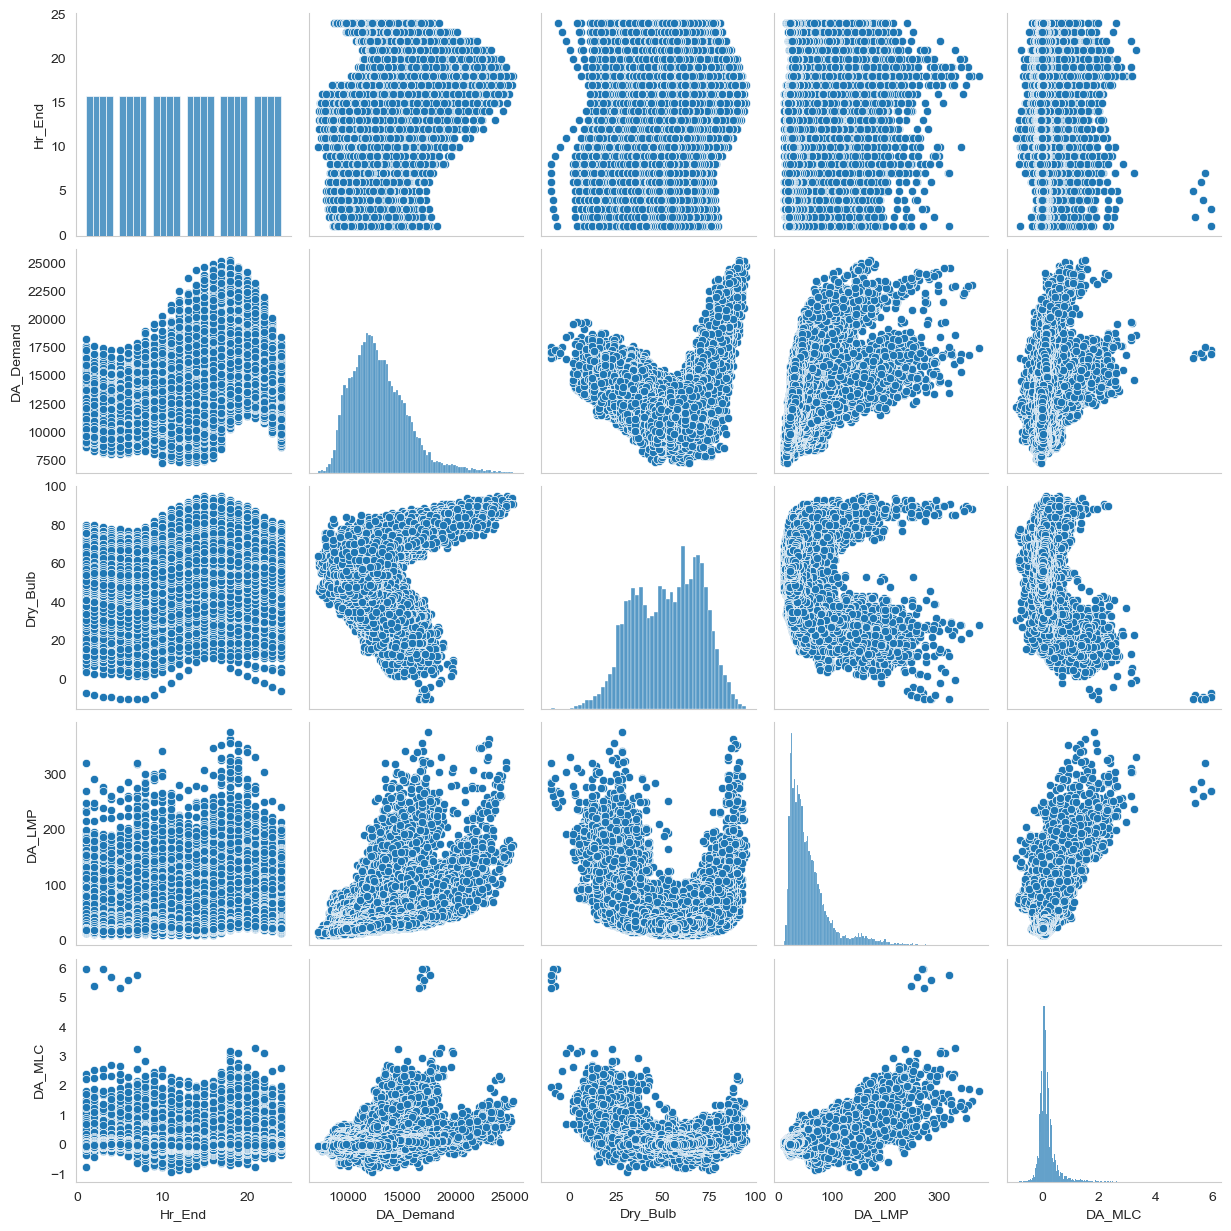

In [10]:
#visualisation of the correlation between some of the features
df_sub = df[['Hr_End','DA_Demand','Dry_Bulb','DA_LMP','DA_MLC']]
sns.pairplot(df_sub)
plt.show

C:\UoW_Apps\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


<function matplotlib.pyplot.show(close=None, block=None)>

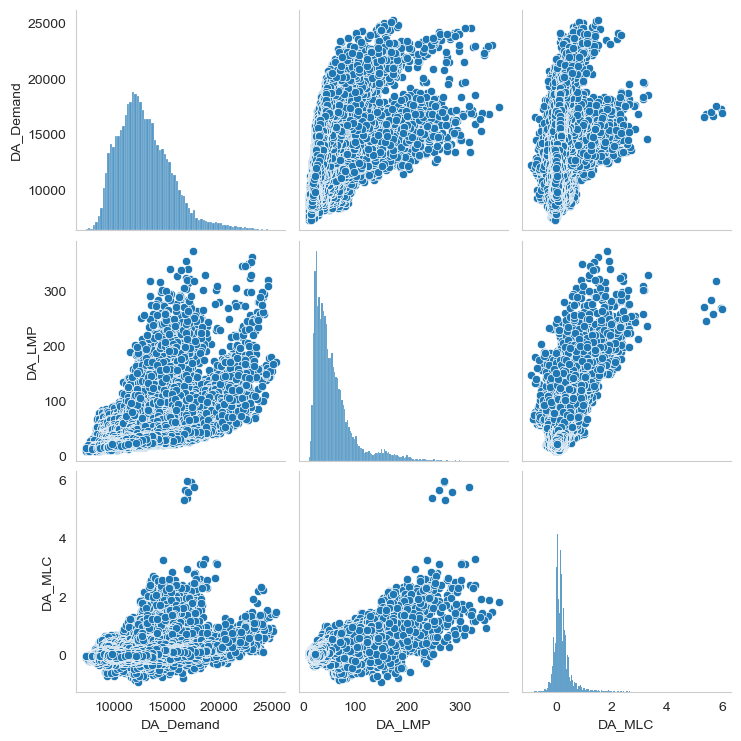

In [11]:
df_sub = df[['DA_Demand','DA_LMP','DA_MLC']]
sns.pairplot(df_sub)
plt.show

C:\UoW_Apps\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


<function matplotlib.pyplot.show(close=None, block=None)>

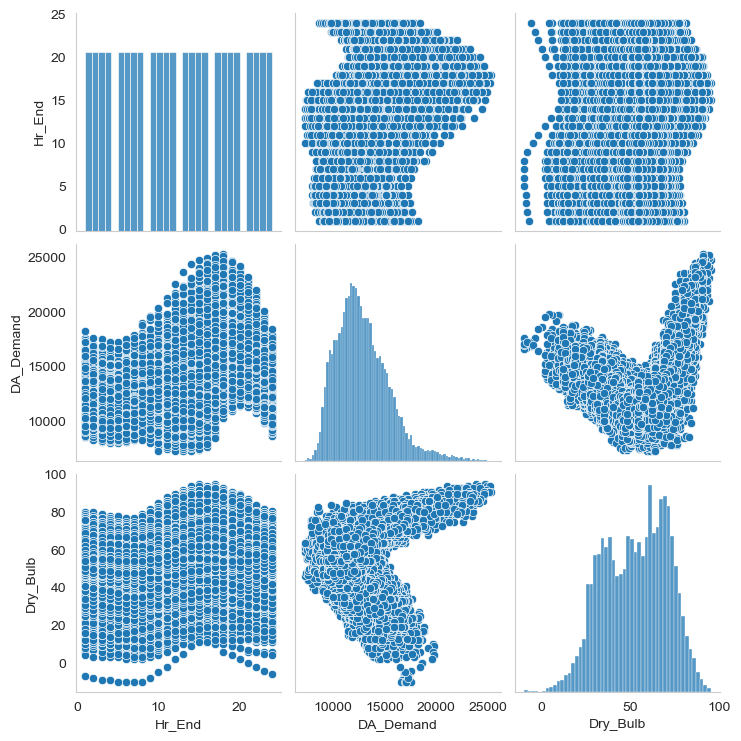

In [12]:
df_sub = df[['Hr_End','DA_Demand','Dry_Bulb']]
sns.pairplot(df_sub)
plt.show
#saving

In [13]:
#using pandas corr() function to calculate Pearson`s correlation
corr = df[['Hr_End','DA_Demand','Dry_Bulb','DA_LMP','DA_MLC']].corr()
corr

,Hr_End,DA_Demand,Dry_Bulb,DA_LMP,DA_MLC
Hr_End,1.000000,0.374757,0.140391,0.123991,0.050623
DA_Demand,0.374757,1.000000,0.224065,0.510509,0.268377
Dry_Bulb,0.140391,0.224065,1.000000,-0.270355,-0.321546
DA_LMP,0.123991,0.510509,-0.270355,1.000000,0.631349
DA_MLC,0.050623,0.268377,-0.321546,0.631349,1.000000


Text(0.5, 1.0, 'Pearson`s correlation')

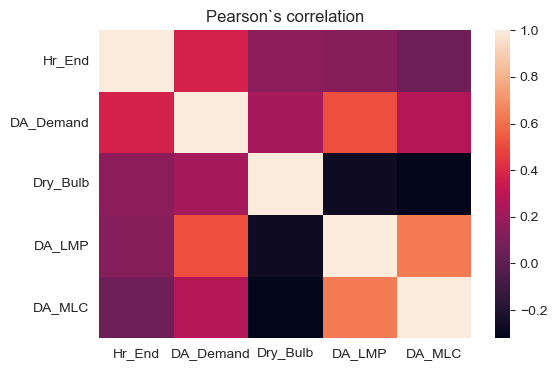

In [14]:
#using seaborn heatmap plot to illustrate Pearson`s correlation
sns.heatmap(corr, xticklabels=corr.columns.values, yticklabels=corr.columns.values)
plt.title('Pearson`s correlation')

In [15]:
#Chi-Squire Test

In [16]:
#creating a dataframne of the objective variables
df = df[['Date', 'Hr_End','DA_Demand','Dry_Bulb']]
df

,Date,Hr_End,DA_Demand,Dry_Bulb
0,01/01/2021,1,11787.2,30
1,01/01/2021,2,11592.4,29
2,01/01/2021,3,11393.0,30
3,01/01/2021,4,11449.2,29
4,01/01/2021,5,11556.5,28
...,...,...,...,...
24067,30/09/2023,20,12667.4,59
24068,30/09/2023,21,12238.9,58
24069,30/09/2023,22,12048.4,58
24070,30/09/2023,23,11311.6,57


In [17]:
#saving the dataset without the raws indeces
df.to_csv('C:/Users/Nedyalka Gabrovska/Desktop/Start/Datasets/ISO_NewDataset.csv', index=False)

In [18]:
#loading data
df = pd.read_csv('C:/Users/Nedyalka Gabrovska/Desktop/Start/Datasets/ISO_NewDataset.csv')
df

,Date,Hr_End,DA_Demand,Dry_Bulb
0,01/01/2021,1,11787.2,30
1,01/01/2021,2,11592.4,29
2,01/01/2021,3,11393.0,30
3,01/01/2021,4,11449.2,29
4,01/01/2021,5,11556.5,28
...,...,...,...,...
24067,30/09/2023,20,12667.4,59
24068,30/09/2023,21,12238.9,58
24069,30/09/2023,22,12048.4,58
24070,30/09/2023,23,11311.6,57


In [19]:
#renaming columns
df.rename(columns={"Hr_End":"Hour","DA_Demand":"Demand","Dry_Bulb":"Temp_F"}, inplace=True)
df

,Date,Hour,Demand,Temp_F
0,01/01/2021,1,11787.2,30
1,01/01/2021,2,11592.4,29
2,01/01/2021,3,11393.0,30
3,01/01/2021,4,11449.2,29
4,01/01/2021,5,11556.5,28
...,...,...,...,...
24067,30/09/2023,20,12667.4,59
24068,30/09/2023,21,12238.9,58
24069,30/09/2023,22,12048.4,58
24070,30/09/2023,23,11311.6,57


<Axes: >

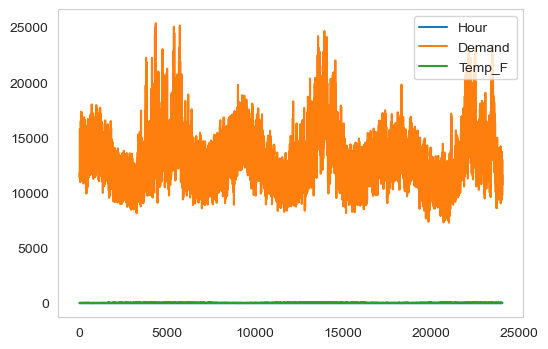

In [20]:
df.plot() 

In [21]:
#print all the column names of the dataframe
print(list(df.columns))

['Date', 'Hour', 'Demand', 'Temp_F']


In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24072 entries, 0 to 24071
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    24072 non-null  object 
 1   Hour    24072 non-null  int64  
 2   Demand  24072 non-null  float64
 3   Temp_F  24072 non-null  int64  
dtypes: float64(1), int64(2), object(1)
memory usage: 752.4+ KB


In [23]:
#statistics
df.describe()

,Hour,Demand,Temp_F
count,24072.00000,24072.000000,24072.000000
mean,12.50000,12925.599587,52.830924
std,6.92233,2606.504672,17.974594
min,1.00000,7286.900000,-10.000000
25%,6.75000,11074.550000,38.000000
50%,12.50000,12549.300000,54.000000
75%,18.25000,14420.200000,68.000000
max,24.00000,25352.700000,95.000000


In [24]:
#isnull( ) detects the missing values and returns a boolean object indicating if the values are NA
df.isnull( )

,Date,Hour,Demand,Temp_F
0,False,False,False,False
1,False,False,False,False
2,False,False,False,False
3,False,False,False,False
4,False,False,False,False
...,...,...,...,...
24067,False,False,False,False
24068,False,False,False,False
24069,False,False,False,False
24070,False,False,False,False


In [25]:
#find out the number of missing values
df.isnull().sum()

Date      0
Hour      0
Demand    0
Temp_F    0
dtype: int64

In [26]:
#identifying and counting the unique values in column Hour
df['Hour'].nunique()

24

In [27]:
#displaying the unique values
df['Hour'].unique()

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24], dtype=int64)

In [28]:
df['Hour'].value_counts()

Hour
1     1003
2     1003
23    1003
22    1003
21    1003
20    1003
19    1003
18    1003
17    1003
16    1003
15    1003
14    1003
13    1003
12    1003
11    1003
10    1003
9     1003
8     1003
7     1003
6     1003
5     1003
4     1003
3     1003
24    1003
Name: count, dtype: int64

In [29]:
#setting index 'Date'
new_df = df.set_index('Date')
new_df

,Hour,Demand,Temp_F
Date,,,
01/01/2021,1,11787.2,30
01/01/2021,2,11592.4,29
01/01/2021,3,11393.0,30
01/01/2021,4,11449.2,29
01/01/2021,5,11556.5,28
...,...,...,...
30/09/2023,20,12667.4,59
30/09/2023,21,12238.9,58
30/09/2023,22,12048.4,58


Text(0, 0.5, 'Demand in MW')

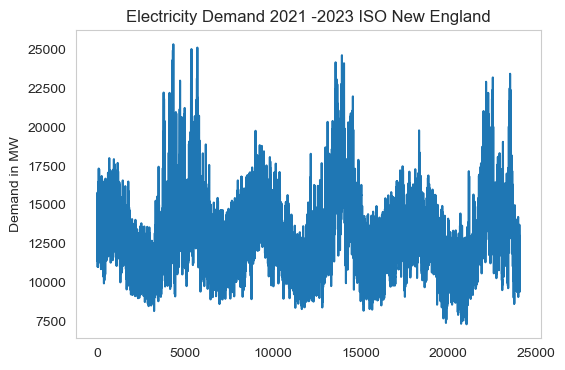

In [30]:
#plotting demand data
df['Demand'].plot()
plt.title('Electricity Demand 2021 -2023 ISO New England')
plt.ylabel('Demand in MW')

Text(0, 0.5, 'Temperature in F')

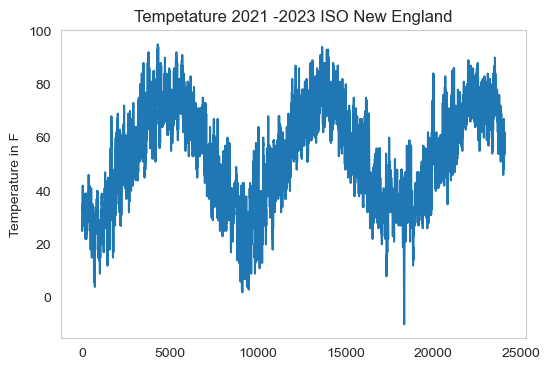

In [31]:
#plotting temperature data
df['Temp_F'].plot()
plt.title('Tempetature 2021 -2023 ISO New England')
plt.ylabel('Temperature in F')

Text(0, 0.5, 'Demand in MW')

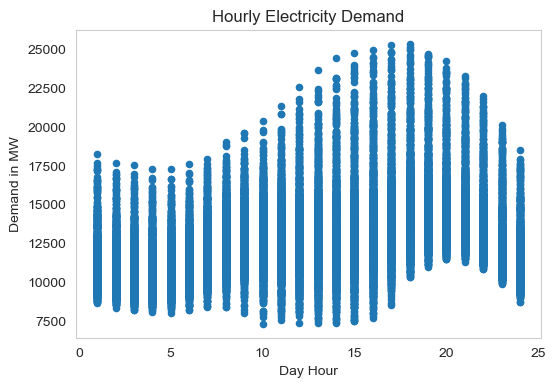

In [32]:
#visualise the demand data spread by hours
df.plot(x = 'Hour', y ='Demand',kind = 'scatter')
plt.title('Hourly Electricity Demand')
plt.xlabel('Day Hour')
plt.ylabel('Demand in MW')

Text(0, 0.5, 'Tempetature in F')

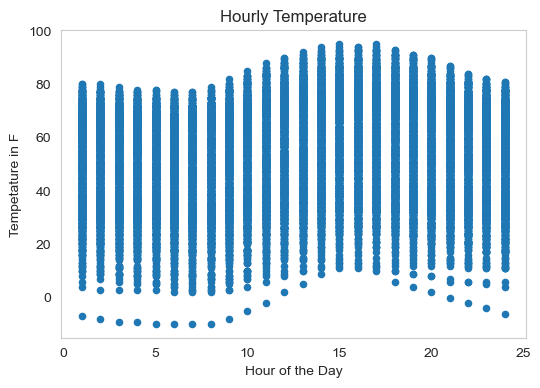

In [33]:
#visualise the temperature data spread by hours
df.plot(x ='Hour', y ='Temp_F',kind = 'scatter')
plt.title('Hourly Temperature')
plt.xlabel('Hour of the Day')
plt.ylabel('Tempetature in F')

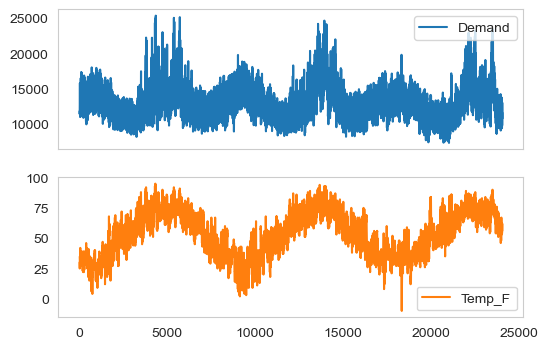

In [34]:
# visualisation of both demand and temp
plot_cols = ['Demand', 'Temp_F']
plot_features = df[plot_cols]
plot_features.index 
_ = plot_features.plot(subplots=True)

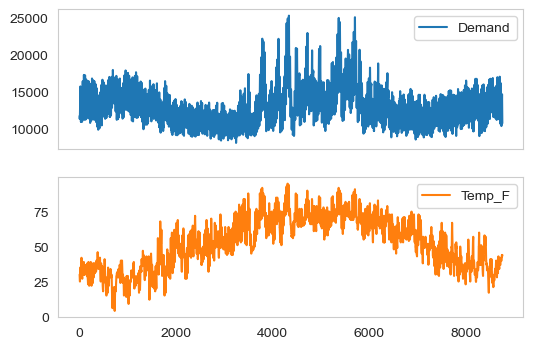

In [35]:
#visualisation of the first 8760 records (year 2021)
plot_features = df[plot_cols][:8760]
plot_features.index
_ = plot_features.plot(subplots=True)

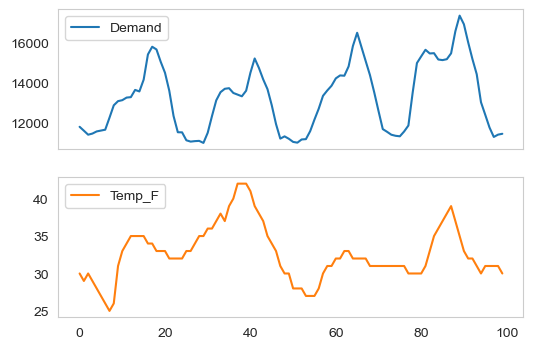

In [36]:
#visualisation of the first 100 records
plot_features = df[plot_cols][:100]
plot_features.index
_ = plot_features.plot(subplots=True)

Text(0, 0.5, 'Demand in MW')

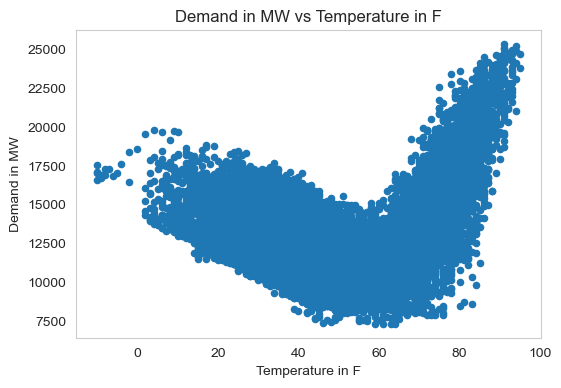

In [37]:
#plotting temp vs demand
df.plot(x ='Temp_F', y='Demand',kind = 'scatter')
plt.title('Demand in MW vs Temperature in F')
plt.xlabel('Temperature in F')
plt.ylabel('Demand in MW')

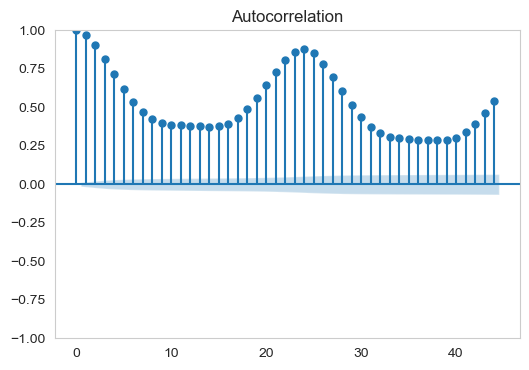

In [38]:
#identifying time lag for 24 hour data frame using autocorrelation function
plot_acf(df['Demand'])
plt.show()

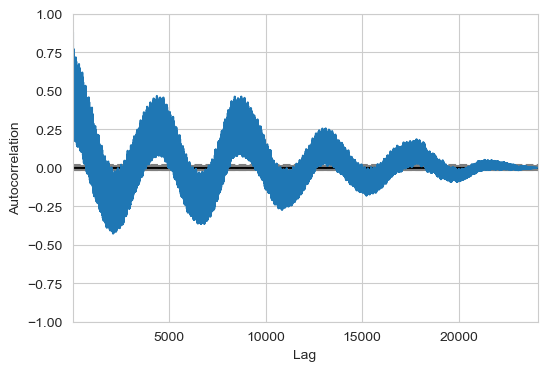

In [39]:
#plotting the degree of the autocorrelation value shown on vertical axis in the data from t=0 to t=24071.
x = pd.plotting.autocorrelation_plot(df['Demand'])

Text(0.5, 1.0, 'Autocorrelation in Demand Data')

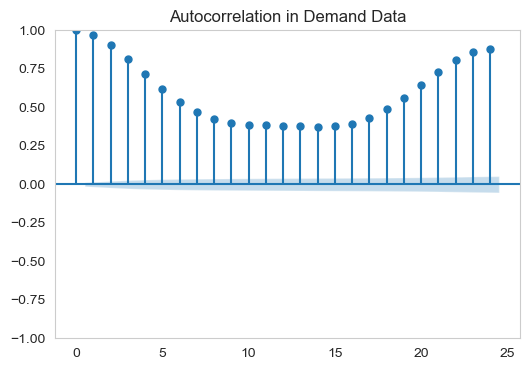

In [40]:
#time lag from t=0 to t=24, 24h period
demand_acf = plot_acf(df['Demand'], lags=24)
plt.title('Autocorrelation in Demand Data')

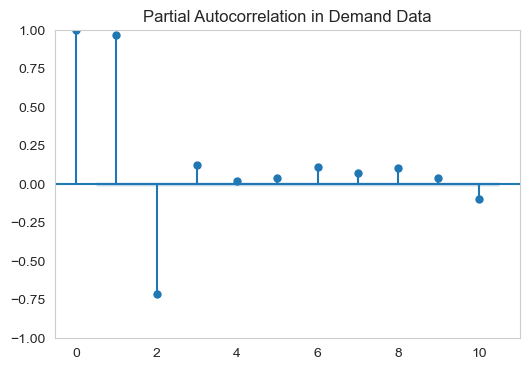

In [41]:
#partial autocorrelation
from statsmodels.graphics.tsaplots import plot_pacf
plot_pacf(df['Demand'], lags=10)
plt.title('Partial Autocorrelation in Demand Data')
plt.show()

In [42]:
#extract data for 6th hour only - Method 1
#condition with df.values property
hour = df['Hour'].values == 6
 
# new dataframe
df_new = df[hour]
 
print(df_new)

             Date  Hour   Demand  Temp_F
5      01/01/2021     6  11599.4      27
29     02/01/2021     6  10982.9      35
53     03/01/2021     6  11171.5      27
77     04/01/2021     6  11850.9      30
101    05/01/2021     6  12353.9      30
...           ...   ...      ...     ...
23957  26/09/2023     6  10769.8      55
23981  27/09/2023     6  10101.4      46
24005  28/09/2023     6  10734.5      48
24029  29/09/2023     6  10728.6      53
24053  30/09/2023     6   9582.3      54

[1003 rows x 4 columns]


In [43]:
#extract data for 6th hour only - Method 2
#slice [start:stop:step], starting from index 5 (6th hour) take every 24th record.
sixth_hour = df[5::24]
sixth_hour

,Date,Hour,Demand,Temp_F
5,01/01/2021,6,11599.4,27
29,02/01/2021,6,10982.9,35
53,03/01/2021,6,11171.5,27
77,04/01/2021,6,11850.9,30
101,05/01/2021,6,12353.9,30
...,...,...,...,...
23957,26/09/2023,6,10769.8,55
23981,27/09/2023,6,10101.4,46
24005,28/09/2023,6,10734.5,48
24029,29/09/2023,6,10728.6,53


In [44]:
#data shape for 6th hour 
sixth_hour.shape

(1003, 4)

In [45]:
#count records
hour = sixth_hour.Hour
hour.value_counts()

Hour
6    1003
Name: count, dtype: int64

In [46]:
sixth_hour.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1003 entries, 5 to 24053
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    1003 non-null   object 
 1   Hour    1003 non-null   int64  
 2   Demand  1003 non-null   float64
 3   Temp_F  1003 non-null   int64  
dtypes: float64(1), int64(2), object(1)
memory usage: 31.5+ KB


In [47]:
#statistics
sixth_hour.describe()

,Hour,Demand,Temp_F
count,1003.0,1003.000000,1003.000000
mean,6.0,11372.309771,47.172483
std,0.0,1552.324840,16.538383
min,6.0,8166.300000,-10.000000
25%,6.0,10162.250000,34.000000
50%,6.0,11166.600000,48.000000
75%,6.0,12321.200000,61.000000
max,6.0,17567.000000,77.000000


Text(0.5, 0, '')

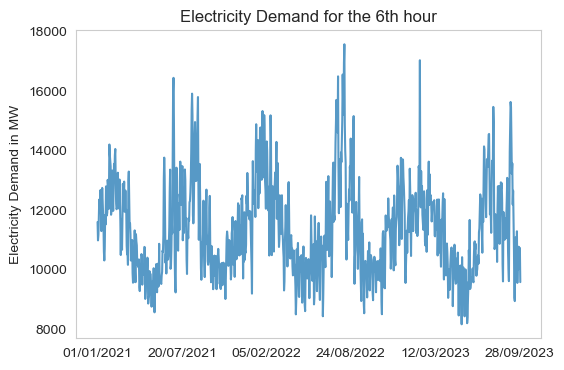

In [48]:
#visualisation 6th hour demand
demand = sixth_hour.Demand
demand.index = sixth_hour['Date']
plt.xlabel('Jan 2021 - Sep 2023')
plt.ylabel('Electricity Demand in MW')
plt.title('Electricity Demand for the 6th hour')
demand.plot(kind='line',alpha=0.75, rot=0)
plt.xlabel("")

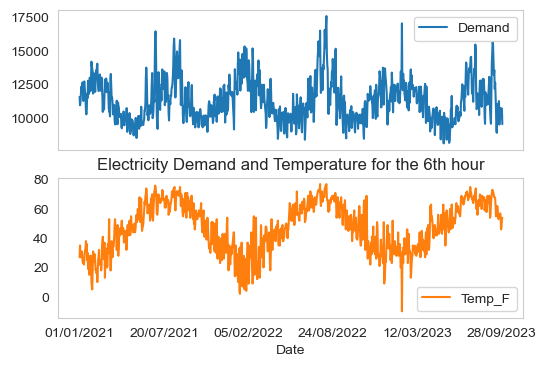

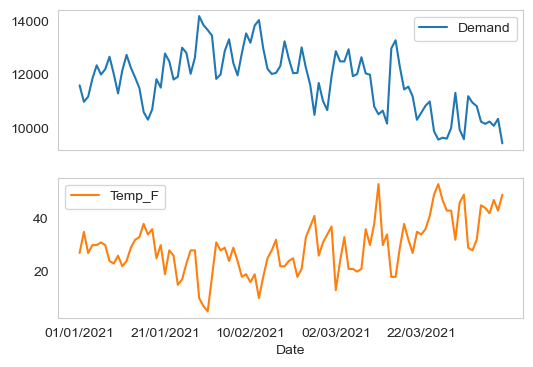

In [49]:
# visualisation 6th hour demand and temp
plot_cols = ['Demand', 'Temp_F']
plot_features = sixth_hour[plot_cols]
plot_features.index = sixth_hour['Date']
_ = plot_features.plot(subplots=True)
plt.title('Electricity Demand and Temperature for the 6th hour')

# visualisation of the first 100 records
plot_features = sixth_hour[plot_cols][:100]
plot_features.index = sixth_hour['Date'][:100]
_ = plot_features.plot(subplots=True)


Text(0, 0.5, 'Demand in MW')

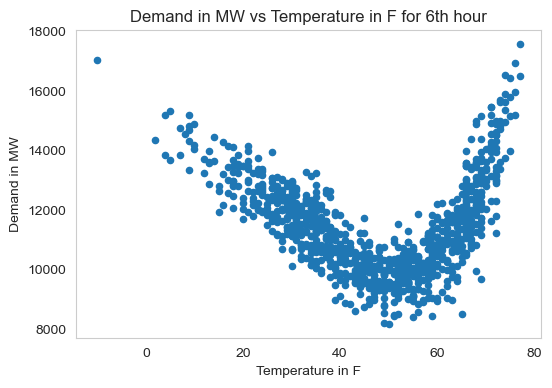

In [50]:
# plotting temperature vs demand for 6th hour
sixth_hour.plot(x ='Temp_F', y='Demand',kind = 'scatter')
plt.title('Demand in MW vs Temperature in F for 6th hour')
plt.xlabel('Temperature in F')
plt.ylabel('Demand in MW')

Text(0, 0.5, 'Demand in MW')

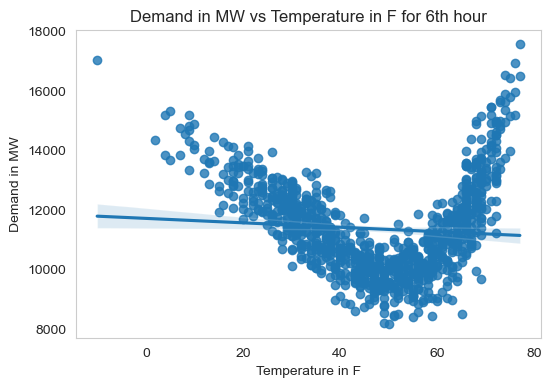

In [51]:
#using seaborn
sns.regplot(x='Temp_F', y='Demand', data= sixth_hour, scatter=True)
plt.title('Demand in MW vs Temperature in F for 6th hour')
plt.xlabel('Temperature in F')
plt.ylabel('Demand in MW')

<Axes: title={'center': 'Temp_F'}, xlabel='Hour'>

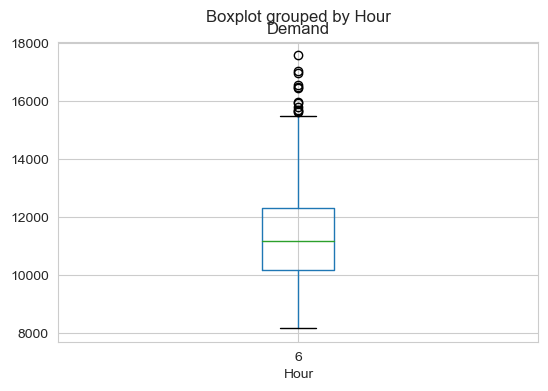

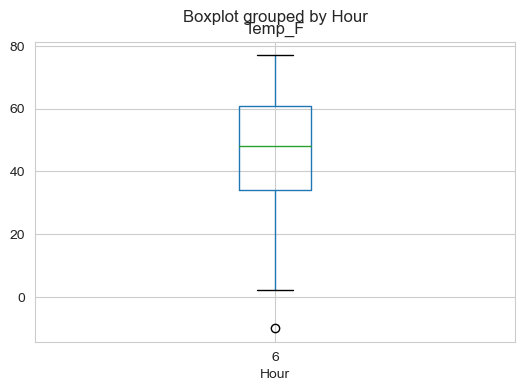

In [52]:
#detecting outliers 
sixth_hour.boxplot(column='Demand',by='Hour')
sixth_hour.boxplot(column='Temp_F',by='Hour')

Text(0.5, 1.0, 'Outliers for 6th hour in Demand Data')

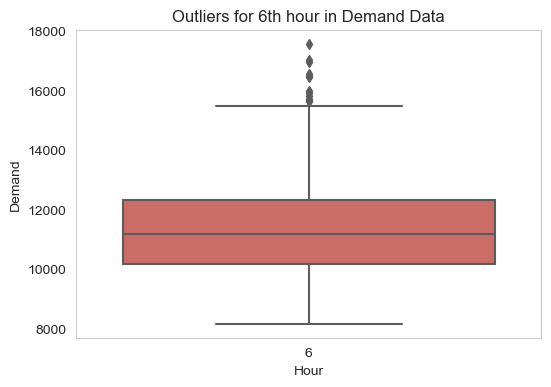

In [53]:
sns.boxplot(x='Hour', y='Demand', data=sixth_hour, palette='hls')
plt.title('Outliers for 6th hour in Demand Data')

Text(0.5, 1.0, 'Outliers for 6th hour in Temperature Data')

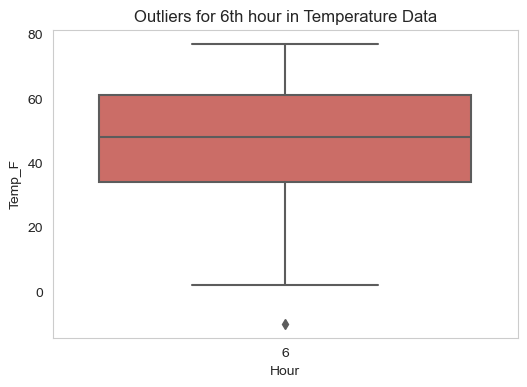

In [54]:
sns.boxplot(x='Hour', y='Temp_F', data=sixth_hour, palette='hls')
plt.title('Outliers for 6th hour in Temperature Data')

<Axes: >

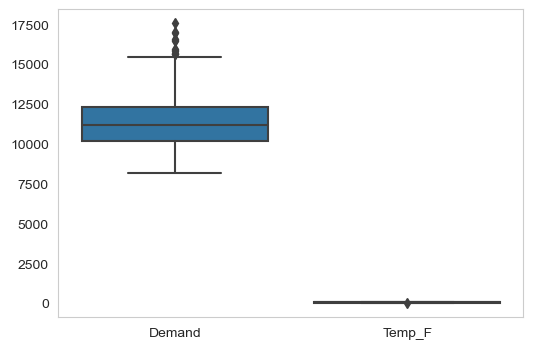

In [55]:
sns.boxplot(sixth_hour[['Demand', 'Temp_F']]) 

<function matplotlib.pyplot.show(close=None, block=None)>

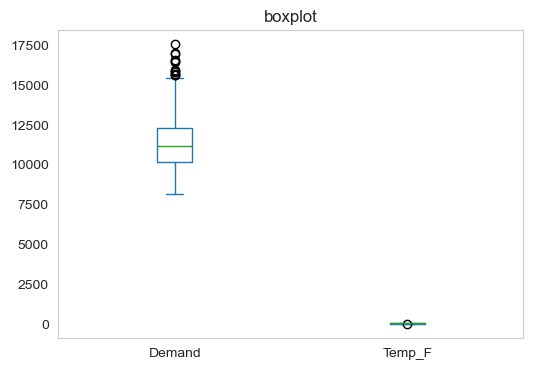

In [56]:
boxplot = sixth_hour[['Demand', 'Temp_F']].plot(kind='box', title='boxplot')
plt.show

In [57]:
#displaying values > 15000 in demand 
demand_sixth = sixth_hour['Demand']
demand_outliers = (demand_sixth > 15000)
sixth_hour[demand_outliers]

,Date,Hour,Demand,Temp_F
4301,29/06/2021,6,15968.8,76
4325,30/06/2021,6,16440.3,75
5357,12/08/2021,6,15353.7,74
5381,13/08/2021,6,15909.5,74
5405,14/08/2021,6,15160.7,75
5693,26/08/2021,6,15185.7,71
5717,27/08/2021,6,15795.7,75
9389,27/01/2022,6,15325.6,5
9485,31/01/2022,6,15188.0,4
9845,15/02/2022,6,15181.0,9


In [58]:
#displaying values < 10 in temperature
temp_sixth = sixth_hour['Temp_F']
temp_outliers = (temp_sixth < 10)
sixth_hour[temp_outliers]

,Date,Hour,Demand,Temp_F
701,30/01/2021,6,13865.2,7
725,31/01/2021,6,13678.8,5
9101,15/01/2022,6,13867.4,4
9125,16/01/2022,6,14353.9,2
9245,21/01/2022,6,14680.5,9
9269,22/01/2022,6,14773.6,7
9389,27/01/2022,6,15325.6,5
9461,30/01/2022,6,14539.9,8
9485,31/01/2022,6,15188.0,4
9509,01/02/2022,6,14825.7,9


Text(0.5, 1.0, 'Autocorrelation in Demand Data for 6th hour')

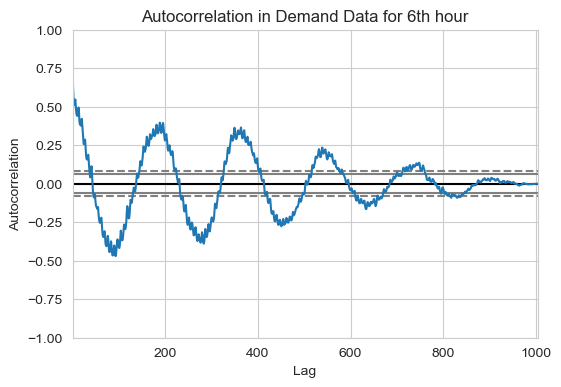

In [59]:
#plotting the degree of the autocorrelation value shown on vertical axis in the data from t=0 to t=1003.
x = pd.plotting.autocorrelation_plot(demand_sixth)
plt.title('Autocorrelation in Demand Data for 6th hour')

Text(0, 0.5, 'Autocorrelation')

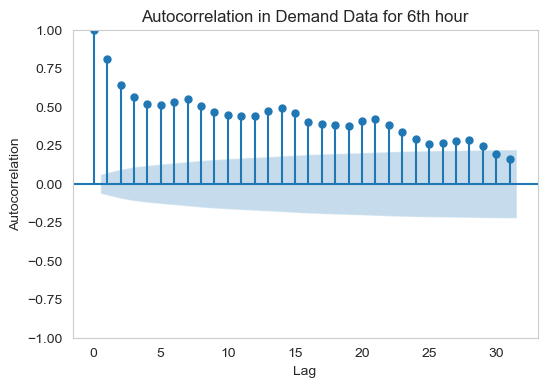

In [60]:
#identifying time lag for 6th hour using autocorrelation function
plot_acf(demand_sixth)
plt.title('Autocorrelation in Demand Data for 6th hour')
plt.xlabel('Lag')
plt.ylabel('Autocorrelation')

Text(0, 0.5, 'Autocorrelation')

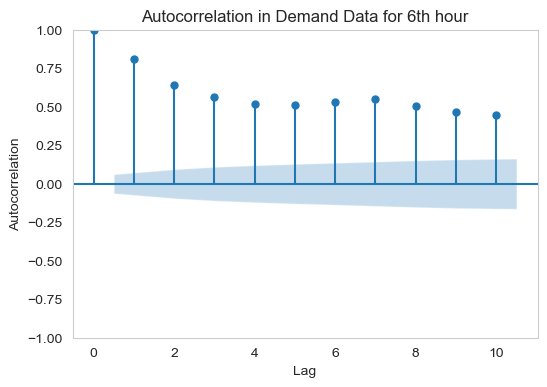

In [61]:
#time lag for 6th hour from t=0 to t=10
sixth_acf = plot_acf(demand_sixth, lags=10)
plt.title('Autocorrelation in Demand Data for 6th hour')
plt.xlabel('Lag')
plt.ylabel('Autocorrelation')

Text(0, 0.5, 'Partial Autocorrelation')

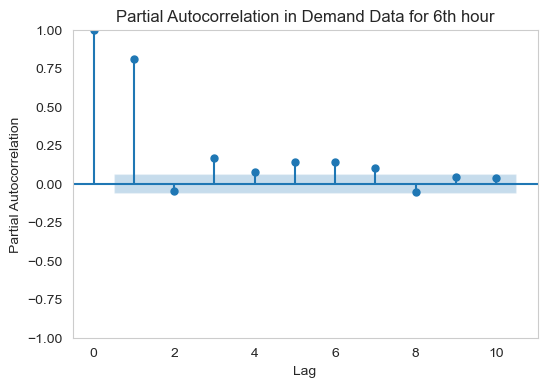

In [62]:
#partial autocorrelation
from statsmodels.graphics.tsaplots import plot_pacf
plot_pacf(demand_sixth, lags=10)
plt.title('Partial Autocorrelation in Demand Data for 6th hour')
plt.xlabel('Lag')
plt.ylabel('Partial Autocorrelation')

In [63]:
#saving dataset
sixth_hour.to_csv('C:/Users/Nedyalka Gabrovska/Desktop/Start/Datasets/ISO_Sixth_Hour.csv', index=False)

In [64]:
#loading data
sixth_hour = pd.read_csv('C:/Users/Nedyalka Gabrovska/Desktop/Start/Datasets/ISO_Sixth_Hour.csv')
sixth_hour

,Date,Hour,Demand,Temp_F
0,01/01/2021,6,11599.4,27
1,02/01/2021,6,10982.9,35
2,03/01/2021,6,11171.5,27
3,04/01/2021,6,11850.9,30
4,05/01/2021,6,12353.9,30
...,...,...,...,...
998,26/09/2023,6,10769.8,55
999,27/09/2023,6,10101.4,46
1000,28/09/2023,6,10734.5,48
1001,29/09/2023,6,10728.6,53


In [65]:
sixth_h_numeric = sixth_hour.filter(["Demand", "Temp_F"], axis = 1)
sixth_h_numeric.head()

,Demand,Temp_F
0,11599.4,27
1,10982.9,35
2,11171.5,27
3,11850.9,30
4,12353.9,30


In [66]:
#nonscaled data
sixth_h_numeric.describe()

,Demand,Temp_F
count,1003.000000,1003.000000
mean,11372.309771,47.172483
std,1552.324840,16.538383
min,8166.300000,-10.000000
25%,10162.250000,34.000000
50%,11166.600000,48.000000
75%,12321.200000,61.000000
max,17567.000000,77.000000


In [68]:
#Min/Max scaling normalizes the data between 0 and 1
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
df_norm = scaler.fit_transform(sixth_h_numeric)
df_norm

array([[0.36519621, 0.42528736],
       [0.29961599, 0.51724138],
       [0.31967832, 0.42528736],
       ...,
       [0.27319242, 0.66666667],
       [0.27256481, 0.72413793],
       [0.15062708, 0.73563218]])

In [69]:
df_norm = pd.DataFrame(df_norm,columns = sixth_h_numeric.columns)
df_norm.head()

,Demand,Temp_F
0,0.365196,0.425287
1,0.299616,0.517241
2,0.319678,0.425287
3,0.391950,0.459770
4,0.445456,0.459770


In [76]:
#splitting dat into train and test sets
column_indices = {name: i for i, name in enumerate(df_norm)}

n = len(df_norm)
train_df = df_norm[0:int(n*0.8)]
#val_df = df_norm[int(n*0.7):int(n*0.9)]
test_df = df_norm[int(n*0.8):]

In [77]:
train_mean = train_df.mean()
train_std = train_df.std()

train_df = (train_df - train_mean) / train_std
#val_df = (val_df - train_mean) / train_std
test_df = (test_df - train_mean) / train_std

In [78]:
train_df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Demand,802.0,5.094290e-17,1.0,-1.932718,-0.775940,-0.132452,0.611769,3.944842
Temp_F,802.0,-2.923680e-16,1.0,-3.259898,-0.771762,-0.001625,0.827753,1.894097


In [79]:
test_df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Demand,201.0,-0.211885,0.980141,-2.106057,-0.933750,-0.427122,0.363878,2.698192
Temp_F,201.0,0.634114,0.693598,-1.067969,0.116858,0.709271,1.242443,1.775615


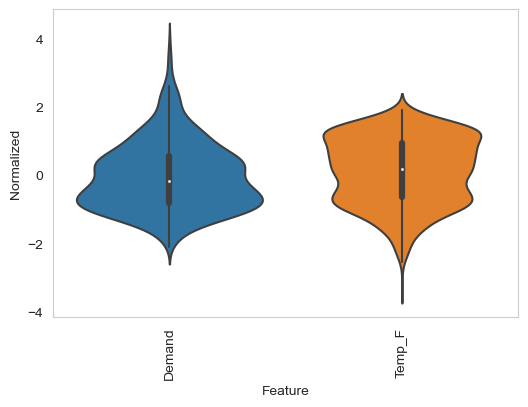

In [80]:
#plotting normalized data
df_std = (df_norm - train_mean) / train_std
df_std = df_std.melt(var_name='Feature', value_name='Normalized')
plt.figure(figsize=(6,4))
ax = sns.violinplot(x='Feature', y='Normalized', data=df_std)
_ = ax.set_xticklabels(df_norm.keys(), rotation=90)

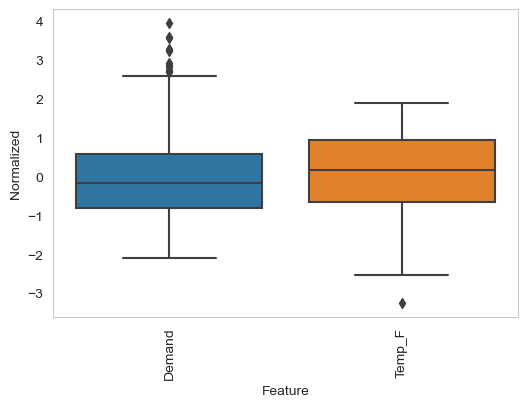

In [81]:
df_std = (df_norm - train_mean) / train_std
df_std = df_std.melt(var_name='Feature', value_name='Normalized')
plt.figure(figsize=(6,4))
ax = sns.boxplot(x='Feature', y='Normalized', data=df_std)
_ = ax.set_xticklabels(df_norm.keys(), rotation=90)